# TF -IDF & K-Means Clustering

## Import Library

### Library yang digunakan

- **Pandas**

- **PySastrawi**

- **scikit-learn**

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Dimentional Reduction - PCA 

## PCA (Principal Component Analysis)

Analisis Komponen Utama (Principal Component Analysis) adalah analisis multivariate yang mentransformasi variabel-variabel asal yang saling berkorelasi menjadi variabel-variabel baru yang tidak saling berkorelasi dengan mereduksi sejumlah variabel tersebut sehingga mempunyai dimensi yang lebih kecil namun dapat menerangkan sebagian besar keragaman variabel aslinya.

Banyaknya komponen utama yang terbentuk sama dengan banyaknya variabel asli. Pereduksian (penyederhanaan) dimensi dilakukan dengan kriteria persentase keragaman data yang diterangkan oleh beberapa komponen utama pertama. Apabila beberapa komponen utama pertama telah menerangkan lebih dari 75% keragaman data asli, maka analisis cukup dilakukan sampai dengan komponen utama tersebut. 

Bila komponen utama diturunkan dari populasi multivariat normal dengan random vektor **X** = (*X1, X2,… , Xp*) dan vektor rata-rata *μ* = (*μ1, μ2, … , μp*) dan matriks kovarians **Σ** dengan akar ciri (*eigenvalue*) yaitu *λ1 ≥ λ2 ≥ ⋯ ≥ λp ≥ 0* didapat kombinasi linier komponen utama yaitu sebagai berikut.

$$Y_{1}=e_{1}^{\prime} X=e_{11}^{\prime} X_{1}+e_{21}^{\prime} X_{2}+\cdots+e_{p 1}^{\prime} X_{p}$$

$$Y_{2}=e_{2}^{\prime} X=e_{12}^{\prime} X_{1}+e_{22}^{\prime} X_{2}+\cdots+e_{p 2}^{\prime} X_{p}$$
$$\vdots$$

$$Y_{p}=e_{p}^{\prime} X=e_{1 p}^{\prime} X_{1}+e_{2 p}^{\prime} X_{p}+\cdots+e_{p p}^{\prime} X_{p}$$


Maka Var(*Yi*) = *ei'Σei* dan Cov(*Yi,Yk*) = *ei'Σei* dimana *i,k* = 1, 2, ... , *p*.

Syarat untuk membentuk komponen utama yang merupakan kombinasi linear dari variabel **X** agar mempunyai varian maksimum adalah dengan memilih vektor ciri (*eigen vector*) yaitu *e* = (*e1, e2, …, ep*) sedemikian hingga Var(*Yi*) = *ei'Σei* maksimum dan *ei'ei* = 1.

- Komponen utama pertama adalah kombinasi linear *e1'X* yang memaksimumkan Var(*e1'X*) dengan syarat *e1'e1* = 1.

- Komponen utama kedua adalah kombinasi linear *e2'X* yang memaksimumkan Var(*e2'X*) dengan syarat *e2'e2* = 1.

- Komponen utama ke-i adalah kombinasi linear *ei'X* yang memaksimumkan Var(*ei'X*) dengan syarat *ei'ek* = 1 dan Cov(*ei'ek*)=0 untuk k < 1.

Antar komponen utama tersebut tidak berkorelasi dan mempunyai variasi yang sama dengan akar ciri dari **Σ**. Akar ciri dari matriks ragam peragam **Σ** merupakan varian dari komponen utama **Y**, sehingga matriks ragam peragam dari **Y** adalah:


Total keragaman variabel asal akan sama dengan total keragaman yang diterangkan oleh komponen utama yaitu:

$$\sum_{J=1}^{P} \operatorname{var}\left(X_{i}\right)=\operatorname{tr}(\Sigma)=\lambda_{1}+\lambda_{2}+\cdots+\lambda_{p}=\sum_{J=1}^{P} \operatorname{var}\left(Y_{i}\right)$$

Penyusutan dimensi dari variabel asal dilakukan dengan mengambil sejumlah kecil komponen yang mampu menerangkan bagian terbesar keragaman data. Apabila komponen utama yang diambil sebanyak *q* komponen, dimana *q < p*, maka proporsi dari keragaman total yang bisa diterangkan oleh komponen utama ke-*i* adalah:

$$\frac{\lambda_{i}}{\lambda_{1}+\lambda_{2}+\cdots+\lambda_{p}} \quad i=1,2, \ldots, p$$

Penurunan komponen utama dari matriks korelasi dilakukan apabila data sudah terlebih dahulu ditransformasikan ke dalam bentuk baku **Z**. Transformasi ini dilakukan terhadap data yang satuan pengamatannya tidak sama. Bila variabel yang diamati ukurannya pada skala dengan perbedaan yang sangat lebar atau satuan ukurannya tidak sama, maka variabel tersebut perlu dibakukan (*standardized*).

Variabel baku (**Z**) didapat dari transformasi terhadap variabel asal dalam matriks berikut:

$$Z=\left(V^{1 / 2}\right)^{-1}(X-\mu)$$

**V1** <sup>1/2</sup> adalah matriks simpangan baku dengan unsur diagonal utama adalah (αii)<sup>1/2</sup> sedangkan unsur lainnya adalah nol. Nilai harapan E(**Z**) = 0 dan keragamannya adalah

$$\operatorname{Cov}(\mathbf{Z})=\left(\mathbf{V}^{1 / 2}\right)^{-1} \Sigma\left(\mathbf{V}^{1 / 2}\right)^{-1}=\rho$$

Dengan demikian komponen utama dari Z dapat ditentukan dari vektor ciri yang didapat melalui matriks korelasi variabel asal *ρ*. Untuk mencari akar ciri dan menentukan vektor pembobotnya sama seperti pada matriks **Σ**. Sementara trace matriks korelasi *ρ* akan sama dengan jumlah *p* variabel yang dipakai.

Pemilihan komponen utama yang digunakan didasarkan pada nilai akar cirinya, yaitu komponen utama akan digunakan jika akar cirinya lebih besar dari satu.

### import Data

In [2]:
#import data frame
df = pd.read_csv("Hasil_TF-IDF.csv")
#df = df.drop("Unnamed: 0", axis=1)
df.head(5)

,Unnamed: 0,abidin,abtrak,accidental,acer,action,adaro,adira,adjusted,administrasi,...,wildansemsi,windows,wispandonosems,with,xl,xterhadap,yakin,yamaha,yustina,zscore
0,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.075176,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.05882,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(49, 1006)

### Dimentional reduction PCA

Mencari n Componen trbaik

In [4]:
# melihat n_component terbaik
# dengan cumulative explained variance
pca = PCA().fit(df)
cmv = pca.explained_variance_ratio_.cumsum()
print(cmv)
print(cmv.shape)

[0.99555591 0.99578909 0.9959962  0.99616746 0.99632308 0.99646927
 0.99661323 0.9967454  0.99686925 0.99699066 0.9971114  0.99722742
 0.99734161 0.99745125 0.99755828 0.99766293 0.99776563 0.99786804
 0.99796888 0.99806681 0.99816318 0.99825804 0.99834918 0.99843867
 0.99852741 0.99861388 0.99869902 0.99878319 0.99886596 0.99894752
 0.99902318 0.9990972  0.9991703  0.99924186 0.99931293 0.99938207
 0.99944817 0.99951199 0.99957378 0.99963494 0.99969325 0.99974968
 0.99980335 0.99985546 0.99990223 0.99994238 0.99997926 1.
 1.        ]
(49,)


Melakukan Reduksi dimensi sebesar 10 componen

In [5]:
# proses reduksi dimensi
pca = PCA(n_components=10)
X_df = pca.fit_transform(df)
X_df.shape

(49, 10)

## K-Means - Clustering

K-Means Clustering merupakan algoritma yang efektif untuk menentukan cluster dalam sekumpulan data, di mana pada algortima tersebut dilakukan analisis kelompok yang mengacu pada pemartisian N objek ke dalam K kelompok (Cluster) berdasarkan nilai rata-rata (means) terdekat. Adapun persamaan yang sering digunakan dalam pemecahan masalah dalam menentukan jarak terdekat adalah persamaan Euclidean berikut :

$$d(p, q)=\sqrt{\left(p_{1}-q_{1}\right)^{2}+\left(p_{2}-q_{2}\right)^{2}+\left(p_{3}-q_{3}\right)^{2}}$$
Keterangan:\
*d* = jarak obyek\
*p* = data\
*q* = centroid

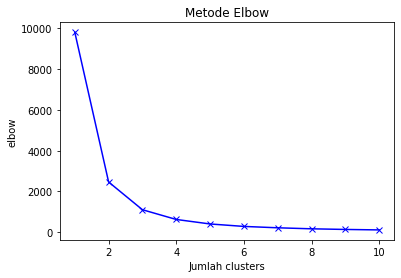

In [6]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(X_df)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('elbow')
plt.show()

In [7]:
# kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=5) # 2 clusters
kmeans.fit(X_df)
y_kmeans = kmeans.predict(X_df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

Menampilkan Scatter data dari Kmeans

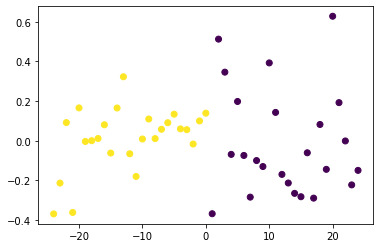

In [8]:
# ploting
plt.scatter(X_df[:, 0], X_df[:, 1], c=y_kmeans);